<h1>ASSIGNMENT 2 :  FAKE BANK NOTES CLASSIFICATION<h1>

<h1>Tushant Yadav 2K18/EE/224<br>
Nishkarsh Sharma 2K18/PE/040<h1>

IMPORTING LIBRARIES

In [48]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()


READING INPUT FROM CSV FILE

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/banknote.csv',names=["Variance", "Skewness", "Curtosis","Entropy","Class"])

In [51]:
dataset.head(5)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


DATASET SPLITING AS PER CLASSES

In [52]:
real = dataset[dataset['Class']==1]
fake = dataset[dataset['Class']==0]
fake_test, fake_train = train_test_split(fake , test_size=0.5)
real_test, real_train = train_test_split(real , test_size=0.5)

In [53]:
fake_test

,Variance,Skewness,Curtosis,Entropy,Class
582,4.055200,0.40143,1.456300,0.65343,0
216,1.323400,3.29640,0.236200,-0.11984,0
128,4.668900,1.30980,0.055404,1.90900,0
236,-1.327400,9.49800,2.440800,-5.26890,0
470,0.872560,9.29310,-0.784300,-2.19780,0
...,...,...,...,...,...
706,3.582900,1.44230,1.021900,1.40080,0
727,-2.647900,10.13740,-1.331000,-5.47070,0
377,-1.992200,11.65420,2.654200,-5.21070,0
217,1.326400,1.03260,5.656600,-0.41337,0


In [54]:
fake_train

,Variance,Skewness,Curtosis,Entropy,Class
632,3.69410,-3.94820,4.26250,1.15770,0
165,4.19270,-3.26740,2.58390,0.21766,0
475,3.82130,0.23175,2.01330,2.05640,0
264,2.48300,6.61550,-0.79287,-0.90863,0
305,1.02840,9.76700,-1.36870,-1.78530,0
...,...,...,...,...,...
458,4.38480,-3.07290,3.04230,1.27410,0
405,0.58982,7.42660,1.23530,-2.95950,0
445,3.18870,-3.41430,2.77420,-0.20260,0
95,-0.64472,-4.60620,8.34700,-2.70990,0


In [55]:
real_train

,Variance,Skewness,Curtosis,Entropy,Class
1139,-1.52280,-6.47890,5.7568,0.87325,1
926,-0.23356,3.24050,-3.0669,-2.77840,1
1080,-0.27068,3.26740,-3.5562,-3.08880,1
887,-3.26920,-12.74060,15.5573,-0.14182,1
1219,-3.57980,0.45937,2.3457,-0.45734,1
...,...,...,...,...,...
1240,-3.55100,1.89550,0.1865,-2.44090,1
1119,-1.43750,-1.86240,4.0260,0.55127,1
1280,-3.35530,0.35591,2.6473,-0.37846,1
950,-2.08910,-0.48422,1.7040,1.74350,1


In [56]:
real_test

,Variance,Skewness,Curtosis,Entropy,Class
1299,-1.080200,2.19960,-2.58620,-1.275900,1
874,-2.799000,1.96790,-0.42357,-2.112500,1
1192,-4.401800,-12.93710,15.65590,-1.680600,1
781,-1.821900,-6.88240,5.46810,0.057313,1
980,0.636550,5.20220,-5.21590,-6.121100,1
...,...,...,...,...,...
1330,-1.100500,-7.25080,6.01390,0.368950,1
909,-1.732200,-9.28280,7.71900,-1.716800,1
1323,-0.025314,-0.17383,-0.11339,1.219800,1
1365,-4.504600,-5.81260,10.88670,-0.528460,1


 SPLITTING IN X AND Y

In [57]:
testset = pd.concat([real_test, fake_test])
trainset = pd.concat([real_train, fake_train])

trainX = trainset.iloc[:, :-1]
trainY = trainset.iloc[:, 4:5].values.ravel()

testX = testset.iloc[:, :-1]
testY = testset.iloc[:, 4:5].values.ravel()

PREDICTION BASED ON PRIOR 

In [58]:
classifier = GaussianNB()
classifier.fit(trainX.values, trainY)
prediction = classifier.predict(testX)
prediction_train =  classifier.predict(trainX)
print(classification_report(prediction_train,trainY))
print(classification_report(prediction,testY))


              precision    recall  f1-score   support

           0       0.90      0.84      0.87       407
           1       0.79      0.86      0.82       279

    accuracy                           0.85       686
   macro avg       0.84      0.85      0.84       686
weighted avg       0.85      0.85      0.85       686

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       401
           1       0.80      0.86      0.83       285

    accuracy                           0.85       686
   macro avg       0.85      0.85      0.85       686
weighted avg       0.85      0.85      0.85       686



CONFUSION MATRICIES

Classification Accuracy: 0.8513119533527697


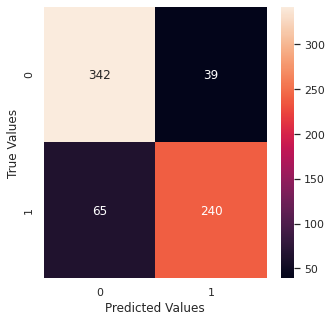

In [59]:
# Train Accuracy
cm = confusion_matrix(trainY, prediction_train)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True Values')
plt.xlabel('Predicted Values')

accuracy = accuracy_score(trainY, prediction)
print(f"Classification Accuracy: {accuracy}")

Classification Accuracy: 0.8513119533527697


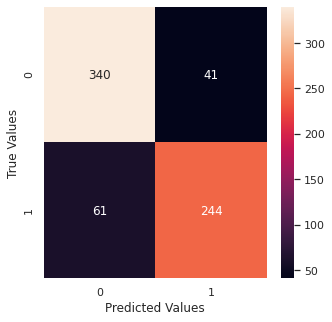

In [60]:
# Test Accuracy
cm = confusion_matrix(testY, prediction)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True Values')
plt.xlabel('Predicted Values')

accuracy = accuracy_score(testY, prediction)
print(f"Classification Accuracy: {accuracy}")

  ROC CURVE 1

ROC_AUC =  0.8461942257217848


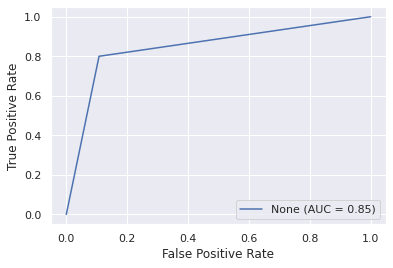

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(testY, prediction)
roc_auc = metrics.auc(fpr, tpr)

print('ROC_AUC = ', roc_auc)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc , estimator_name= None)
display.plot()  
plt.show()

CHANGING PRIORS TO 0.1 AND 0.9

In [67]:
classifier.class_prior_ = [0.1,0.9]
prediction = classifier.predict(testX)
prediction_train =  classifier.predict(trainX)
print(classification_report(prediction_train,trainY))
print(classification_report(prediction,testY))

              precision    recall  f1-score   support

           0       0.62      0.98      0.76       241
           1       0.99      0.68      0.80       445

    accuracy                           0.78       686
   macro avg       0.80      0.83      0.78       686
weighted avg       0.86      0.78      0.79       686

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       253
           1       1.00      0.70      0.82       433

    accuracy                           0.81       686
   macro avg       0.83      0.85      0.81       686
weighted avg       0.87      0.81      0.81       686



CONFUSION MATRICIES

Classification Accuracy: 0.7842565597667639


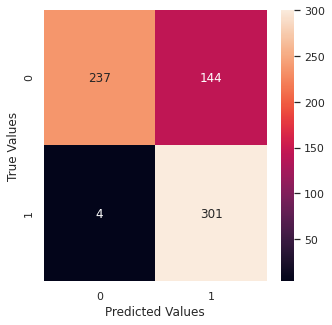

In [63]:
# Train Accuracy
cm = confusion_matrix(trainY, prediction_train)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True Values')
plt.xlabel('Predicted Values')

accuracy = accuracy_score(trainY, prediction_train)
print(f"Classification Accuracy: {accuracy}")

Classification Accuracy: 0.8104956268221575


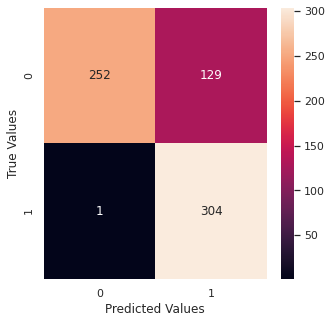

In [64]:
# Test Accuracy
cm = confusion_matrix(testY, prediction)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True Values')
plt.xlabel('Predicted Values')

accuracy = accuracy_score(testY, prediction)
print(f"Classification Accuracy: {accuracy}")

ROC CURVE 2

ROC_AUC =  0.8290693171550277


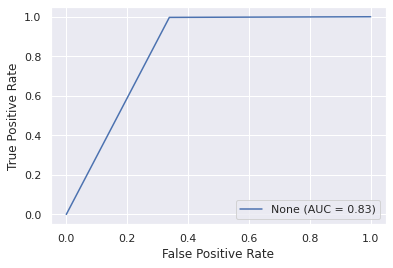

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(testY, prediction)
roc_auc = metrics.auc(fpr, tpr)

print('ROC_AUC = ', roc_auc)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc , estimator_name= None)
display.plot()  
plt.show()